In [1]:
import pandas as pd 
from google.cloud import bigquery
import json
import requests


In [2]:
def request(requested_url):
    headers = {
    "cache-control": "no-cache",
    "Postman-Token": "2defb9f3-9b11-499b-be4f-82505a2f8e1a",
    }
    response = requests.request("GET", requested_url, headers=headers)
    return json.loads(response.text)

In [3]:
request('https://api.covidtracking.com/v2/states/mi.json')

{'meta': {'build_time': '2021-06-01T07:04:31.869Z',
  'license': 'CC-BY-4.0',
  'version': '2.0-beta',
  'field_definitions': [{'name': 'State code',
    'field': 'state_code',
    'deprecated': False,
    'prior_names': ['state']},
   {'name': 'COVID Tracking Project preferred total test units',
    'field': 'covid_tracking_project.preferred_total_test.units',
    'deprecated': False,
    'prior_names': ['covidTrackingProjectPreferredTotalTestUnits']},
   {'name': 'COVID Tracking Project preferred total test field',
    'field': 'covid_tracking_project.preferred_total_test.field',
    'deprecated': False,
    'prior_names': ['covidTrackingProjectPreferredTotalTestField']},
   {'name': 'State population (2019 census)',
    'field': 'census.population',
    'deprecated': False,
    'prior_names': []},
   {'name': 'Tertiary source for state COVID data',
    'field': 'sites.tertiary',
    'deprecated': False,
    'prior_names': ['covid19SiteTertiary']},
   {'name': 'Secondary source for s

In [4]:
#se utilizara SQL en vez de API
#base utilizada bigquery-public-data.covid19_jhu_csse
client = bigquery.Client()
dataset_ref = client.dataset("covid19_open_data", project="bigquery-public-data")
#cambio de base a bigquery-public-data.covid19_open_data

dataset = client.get_dataset(dataset_ref)

In [5]:
query = """
        SELECT distinct date, opulation_male
        FROM bigquery-public-data.covid19_open_data.covid19_open_data
        WHERE country_name = 'Chile'
        """

#realizamos un query en el cual se extraen los datos de fecha y casos nuevos confirmados solo para Chile.

In [6]:
query_job = client.query(query)
chilean_cases = query_job.to_dataframe()
chilean_cases

,date,new_confirmed
0,2020-12-24,68
1,2022-05-14,119
2,2021-02-26,448
3,2021-03-23,631
4,2021-11-07,88
...,...,...
41219,2021-09-06,51
41220,2020-12-18,51
41221,2021-11-22,51
41222,2022-03-07,51


In [7]:
#Podemos observar que los datos en la tablas estan desordenados asi que lo siguiente por hacer es ordenar estos mismos por la fecha.

In [8]:
chilean_cases = chilean_cases.dropna().sort_values('date').reset_index(drop=True)
chilean_cases

,date,new_confirmed
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
40485,2022-09-13,62
40486,2022-09-13,89
40487,2022-09-13,39
40488,2022-09-13,203


In [9]:
#al ordenar los datos podemos observar que se tienen dupplicados en las fechas, por que al discutir con el profersor se realiza una corrección.
chilean_cases.groupby("date").agg("sum")

,new_confirmed
date,
2020-01-01,0
2020-01-02,0
2020-01-03,0
2020-01-04,0
2020-01-05,0
...,...
2022-09-09,24044
2022-09-10,8726
2022-09-11,7722


<Axes: title={'center': 'chilean cases'}, xlabel='date', ylabel='n° de casos'>

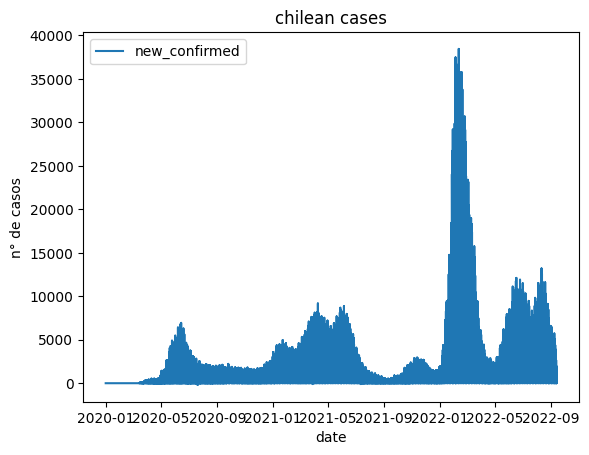

In [10]:
#Ya teniendo todos los datos necesarios en regla se procede a graficar y analizar.
chilean_cases.set_index('date').plot(title = "chilean cases", ylabel = "n° de casos")

In [11]:
#Luego de graficar se puede observar que los casos aumentan y disminuyen con el tiempo pero entre enero y mayo del año 2022 hubo un peak considerable de casos nuevos.

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/COVID-19-Chile-log.svg/langes-500px-COVID-19-Chile-log.svg.png>


In [12]:
#Podemos observar una concordancia entre los casos nuevos entre ambas graficas.

In [13]:
#Se realiza el proceso analogo al anterior pero esta vez queremos estudiar las defunciones, segun la fecha, para Chile.
query = """
        SELECT distinct date, new_deceased
        FROM bigquery-public-data.covid19_open_data.covid19_open_data
        WHERE country_name = 'Chile'
        """

query_job = client.query(query)
chilean_deaths = query_job.to_dataframe()

In [30]:
chilean_deaths = chilean_deaths.dropna().sort_values('date').reset_index(drop=True)
chilean_deaths.groupby("date").agg("sum")
chilean_deaths

,date,new_deceased
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
7562,2022-09-12,4
7563,2022-09-13,8
7564,2022-09-13,10
7565,2022-09-13,0


<Axes: title={'center': 'chilean deaths'}, xlabel='date', ylabel='n° de muertes'>

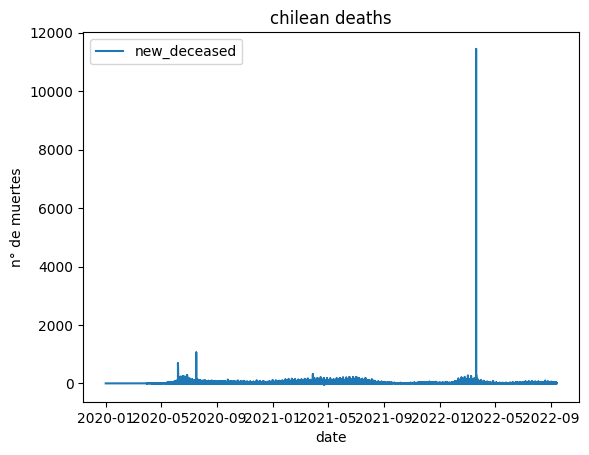

In [15]:
chilean_deaths.set_index('date').plot(title = "chilean deaths", ylabel = "n° de muertes")

In [16]:
#Podemos observar que en una fecha similar a como sucedió en los nuevos casos, se tiene un peak entre enero y mayo del año 2022, aunque el comportamiento de la gráfica es un tanto raro debido al peak tan abrupto.

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/COVID-19-Chile-log.svg/langes-500px-COVID-19-Chile-log.svg.png>


In [17]:
#Nuevamente podemos ver una relación entre los casos de muertes entre ambas gráficas.

In [34]:
query = """
        SELECT distinct date, school_closing
        FROM bigquery-public-data.covid19_open_data.covid19_open_data
        WHERE country_name = 'Chile'
        """

query_job = client.query(query)
school_closing = query_job.to_dataframe()

In [35]:
school_closing = school_closing.dropna().sort_values('date').reset_index(drop=True)
school_closing.groupby("date").agg("sum")
school_closing

,date,school_closing
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
924,2022-07-13,1
925,2022-07-14,1
926,2022-07-15,1
927,2022-07-16,1


<Axes: title={'center': 'schools closing'}, xlabel='date', ylabel='n° de escuelas cerradas'>

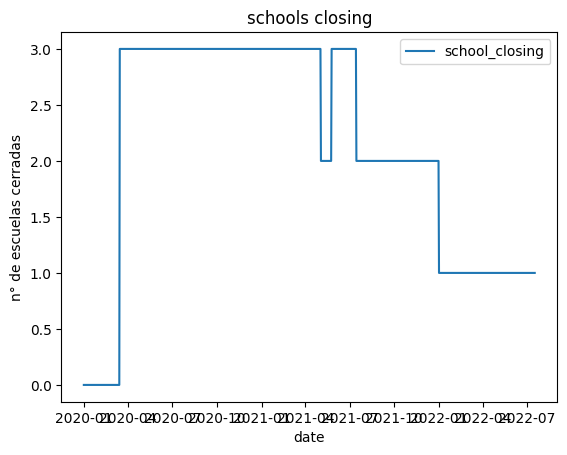

In [38]:
school_closing.set_index('date').plot(title = "schools closing", ylabel = "n° de escuelas cerradas")

In [ ]:
#se puede observar como en un comienzo no se ve un mayor cambio pero poco despues se ve el incremento en escuelas que CERRARON debido a los contagios de covid-19, pero que con el tiempo y regularizacion de los casos se comenzaron a reanudar las actividades en estos. (la cantidad de instituciones obtenidas no es reflejada con la realidad puesto que muchas mas instituciones deberieron de haber cerrrado sus puertas)

In [39]:
query = """
        SELECT distinct date, workplace_closing
        FROM bigquery-public-data.covid19_open_data.covid19_open_data
        WHERE country_name = 'Chile'
        """

query_job = client.query(query)
workplace_closing = query_job.to_dataframe()

In [40]:
workplace_closing = workplace_closing.dropna().sort_values('date').reset_index(drop=True)
workplace_closing.groupby("date").agg("sum")
workplace_closing

,date,workplace_closing
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
933,2022-07-22,3
934,2022-07-23,3
935,2022-07-24,3
936,2022-07-25,3


<Axes: title={'center': 'workplaces closing'}, xlabel='date', ylabel='n° de lugares de trabajo cerrados'>

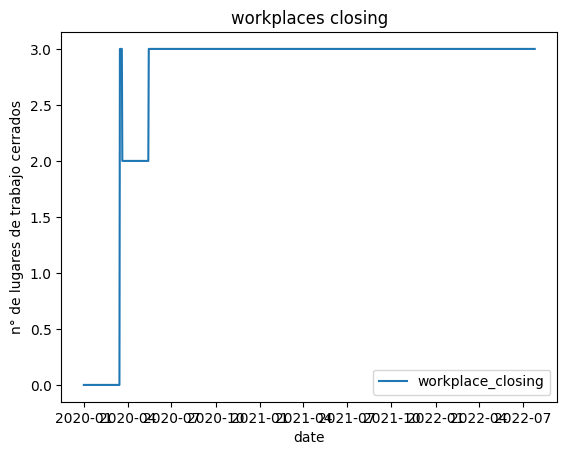

In [41]:
workplace_closing.set_index('date').plot(title = "workplaces closing", ylabel = "n° de lugares de trabajo cerrados")

In [ ]:
#como se puede observar la cantidad de instituciones de trabajo que CERRARON sus puertas aumenta y se mantiene con el tiempo hasta mediados del año 2022, en este caso este comportamiento debe ser debido a la implementación del trabajo remoto en las instituciones, a diferencia de las instituciones de estudio que se buscaba regresar a las clases presenciales.